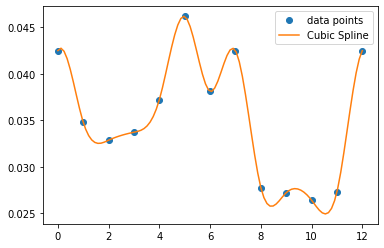

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 数据
x = np.arange(13)
temp = [0.042512,0.034792,0.032882,0.033738,0.037245,0.046181,0.038125,0.042512,0.027789,0.027234,0.026435,0.027315]
y=np.concatenate((temp, [temp[0]]), axis=0)
# 三次样条插值
cs = CubicSpline(x, y, bc_type='periodic')

# 创建平滑的x值，用于绘图
x_new = np.linspace(0, 12, 100)
y_new = cs(x_new)

# 绘制结果
plt.plot(x, y, 'o', label='data points')
plt.plot(x_new, y_new, label='Cubic Spline')
plt.legend()
plt.show()


In [2]:
print("三次方系数")
print(cs.c[0])
print("二次方系数")
print(cs.c[1])
print("一次方系数")
print(cs.c[2])
print("常数项系数")
print(cs.c[3])

三次方系数
[ 0.0115531  -0.00367802  0.00011499  0.00310305 -0.00974921  0.01347278
 -0.0147069   0.01380182 -0.00722239  0.00067575  0.00644241 -0.01380738]
二次方系数
[-0.02413874  0.01052056 -0.00051351 -0.00016853  0.00914063 -0.02010699
  0.02031134 -0.02380936  0.01759611 -0.00407107 -0.00204383  0.01728339]
一次方系数
[ 0.00486564 -0.00875254  0.00125452  0.00057248  0.00954458 -0.00142178
 -0.00121744 -0.00471546 -0.01092872  0.00259632 -0.00351858  0.01172098]
常数项系数
[0.042512 0.034792 0.032882 0.033738 0.037245 0.046181 0.038125 0.042512
 0.027789 0.027234 0.026435 0.027315]


Exception in Tkinter callback
Traceback (most recent call last):
  File "F:\Anaconda3\envs\GraduationDesign3.6\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "F:\Anaconda3\envs\GraduationDesign3.6\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "F:\Anaconda3\envs\GraduationDesign3.6\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "F:\Anaconda3\envs\GraduationDesign3.6\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "F:\Anaconda3\envs\GraduationDesign3.6\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "F:\Anaconda3\envs\GraduationDesign3.6\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.R

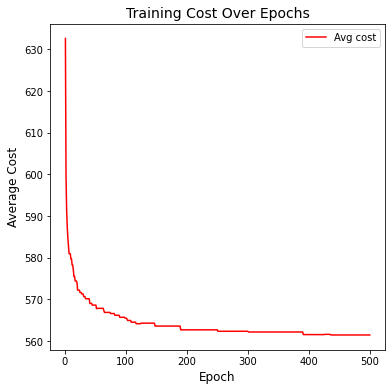

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 读取保存的代价数据
costs = np.loadtxt('all_costs.txt')

# 生成 X 轴，即 epoch 的编号
epochs = np.arange(1, len(costs) + 1)

# 设置图表大小和背景颜色
plt.figure(figsize=(6, 6), facecolor='white')

# 绘制点线图（蓝色线和红色点）
plt.plot(epochs, costs, linestyle='-', color='r', label='Avg cost')
# plt.scatter(epochs, costs, color='r', zorder=5)  # 添加红色点

# 添加标题和标签
plt.title('Training Cost Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Average Cost', fontsize=12)

# 显示图例
plt.legend()

# 显示图表
plt.show()


In [3]:
class Layer:
    def __init__(self, name):
        self.name = name

    def __repr__(self):
        return f"Layer({self.name})"


# 假设我们要创建3个Layer实例
n_layers = 3

# 使用生成器表达式和解包操作符
layers = [
    Layer("Attention Layer")
    for _ in range(n_layers)
]

print(layers)


Sequential(
  (0): Layer()
  (1): Layer()
  (2): Layer()
)


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 多头注意力机制 (MultiHeadAttention)
class MultiHeadAttention(nn.Module):
    def __init__(self, n_heads, input_dim, embed_dim):
        super(MultiHeadAttention, self).__init__()
        self.n_heads = n_heads
        self.input_dim = input_dim
        self.embed_dim = embed_dim

        assert embed_dim % n_heads == 0, "Embedding dimension must be divisible by number of heads"

        self.head_dim = embed_dim // n_heads

        # 定义查询、键、值的线性变换
        self.query = nn.Linear(input_dim, embed_dim)
        self.key = nn.Linear(input_dim, embed_dim)
        self.value = nn.Linear(input_dim, embed_dim)

        # 输出线性变换
        self.fc_out = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        batch_size = x.shape[0]
        seq_len = x.shape[1]

        # 对输入进行线性变换
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)

        # 将输入的嵌入分为多个头
        Q = Q.view(batch_size, seq_len, self.n_heads, self.head_dim).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.n_heads, self.head_dim).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.n_heads, self.head_dim).transpose(1, 2)

        # 计算注意力得分 (scaled dot-product attention)
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)

        # 应用注意力权重到值上
        out = torch.matmul(attention_weights, V)

        # 将多头输出拼接在一起并通过输出线性层
        out = out.transpose(1, 2).contiguous().view(batch_size, seq_len, self.embed_dim)
        out = self.fc_out(out)

        return out

# 残差连接 (SkipConnection)
class SkipConnection(nn.Module):
    def __init__(self, layer):
        super(SkipConnection, self).__init__()
        self.layer = layer

    def forward(self, x):
        # 残差连接：将输入与通过层的输出相加
        return x + self.layer(x)

# 例子：使用多头注意力和残差连接
class TransformerWithSkipConnection(nn.Module):
    def __init__(self, n_heads, input_dim, embed_dim):
        super(TransformerWithSkipConnection, self).__init__()

        # 初始化多头注意力层
        self.attention = MultiHeadAttention(n_heads, input_dim, embed_dim)

        # 使用残差连接将多头注意力包裹
        self.skip_connection = SkipConnection(self.attention)

    def forward(self, x):
        return self.skip_connection(x)

# 创建一个样本输入 (batch_size, seq_len, input_dim)
batch_size = 2
seq_len = 5
input_dim = 128  # 输入的维度
embed_dim = 128  # 嵌入维度
n_heads = 8  # 注意力头数

x = torch.rand(batch_size, seq_len, input_dim)  # 随机生成输入

# 初始化模型
model = TransformerWithSkipConnection(n_heads=n_heads, input_dim=input_dim, embed_dim=embed_dim)

# 进行前向传播
output = model(x)

print("Input shape:", x.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([2, 5, 128])
Output shape: torch.Size([2, 5, 128])


In [3]:
import torch
import torch.nn as nn

# 定义一个简单的 SkipConnection 类
class SkipConnection(nn.Module):
    def __init__(self, module):
        super(SkipConnection, self).__init__()
        self.module = module

    def forward(self, input):
        print("skip_forward")
        return input + self.module(input)

# 定义一个简单的 Linear 模块，模拟 MultiHeadAttention 的行为
class SimpleAttention(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleAttention, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, input):
        print("simple_forward")
        return self.linear(input)

# 定义一个带有 SkipConnection 的层
class SimpleLayer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleLayer, self).__init__()
        self.skip_connection = SkipConnection(
            SimpleAttention(input_dim, input_dim)
        )  # 这里确保 output_dim = input_dim

    def forward(self, input):
        print("layer_forward")
        return self.skip_connection(input)

# 运行的代码
if __name__ == "__main__":
    # 创建一个简单的模型
    model = SimpleLayer(input_dim=4, output_dim=4)  # input_dim 和 output_dim 保持一致

    # 创建一个随机的输入张量 (batch_size, n_query, input_dim)
    input_data = torch.randn(3, 5, 4)  # 假设 batch_size=3, n_query=5, input_dim=4

    # 运行模型
    output_data = model(input_data)

    # 打印输入和输出
    print("Input data shape:", input_data.shape)
    print("Output data shape:", output_data.shape)
    print("Output data:", output_data)


layer_forward
skip_forward
simple_forward
Input data shape: torch.Size([3, 5, 4])
Output data shape: torch.Size([3, 5, 4])
Output data: tensor([[[-0.3359, -0.3221,  0.2785, -0.8929],
         [-0.2777,  0.0509, -0.0991, -0.5829],
         [ 0.3663, -1.4419, -0.5867, -1.6794],
         [-0.6621,  0.1770,  0.1940,  0.0800],
         [ 0.9374, -0.2926,  0.0421, -0.3786]],

        [[ 0.0369,  0.7301,  1.3823,  0.4251],
         [-0.2640, -0.4285,  1.0097, -0.2108],
         [ 0.2936, -1.4347, -0.4520,  0.1351],
         [ 0.8639,  0.1204, -0.7464, -0.4256],
         [-0.2069, -1.4266,  1.1505, -0.2553]],

        [[-0.4437,  2.2101,  0.8833,  1.8535],
         [ 0.2804,  2.0501,  0.8503,  1.1379],
         [-0.0658,  0.1123, -0.3086,  0.4412],
         [-0.5970, -0.0186,  0.9403,  0.8667],
         [ 1.2289, -1.4653, -0.4576, -1.7521]]], grad_fn=<AddBackward0>)


In [1]:
[[i for j in range(4)] for i in range(4)]

[[0, 0, 0, 0], [1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]]